In [589]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [590]:
# leitura do arquivo de treino
url = 'https://raw.githubusercontent.com/Enrico-13/Atividade-02/main/Dados/train.csv'
df = pd.read_csv(url)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [591]:
# verificação das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [592]:
# criação das listas das colunas quantitativas e qualitativas
qualitative = [column for column in df.columns if df.dtypes[column] == object]
quantitative = [column for column in df.columns if df.dtypes[column] != object]
quantitative.remove('SalePrice')
quantitative.remove('Id')

In [593]:
# criação dos dataframes com essas informações
qualitative_columns = pd.DataFrame(qualitative)
qualitative_columns.columns = ['qualitativas']

quantitative_columns = pd.DataFrame(quantitative)
quantitative_columns.columns = ['quantitativas']

In [594]:
# criação do arquivo excel para estudo próprio

def criar_excel():
    excel_path = '../Dados/exploracao.xlsx'
    with pd.ExcelWriter(excel_path, engine='xlsxwriter') as writer:
        workbook = writer.book

        qualitative_columns.to_excel(writer, sheet_name='qualitativas', index=False, startcol=1, startrow=1)
        quantitative_columns.to_excel(writer, sheet_name='quantitativas',index=False, startcol=1, startrow=1)
        

# criar_excel()


In [595]:
def missing_values(dataframe):
    for column in qualitative:
        dataframe[column] = dataframe[column].astype('category')
        if dataframe[column].isnull().any():
            dataframe[column] = dataframe[column].cat.add_categories(['MISSING'])
            dataframe[column] = dataframe[column].fillna('MISSING')
    for column in quantitative:
        if dataframe[column].isnull().any():
            dataframe[column] = dataframe[column].fillna(dataframe[column].mean())

    return dataframe


df = missing_values(df)

In [596]:
# Criação do boxplot para visualização da interação dos valores categóricos com o valor de venda do imóvel
def gerar_boxplots():
    def boxplot(x, y, **kwargs):
        sns.boxplot(x=x, y=y)
        x=plt.xticks(rotation=90)


    df_melt = pd.melt(df, id_vars=['SalePrice'], value_vars=qualitative)
    gridmap = sns.FacetGrid(df_melt, col="variable",  col_wrap=2, sharex=False, sharey=False, height=2.5)
    gridmap = gridmap.map(boxplot, "value", "SalePrice")


# gerar_boxplots()

In [597]:
# criação e remoção de colunas
def column_filtering(dataframe, sale_price=True):
    dataframe['Has2ndFlr'] = dataframe['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    desired_columns = [
    'Id',
    'OverallQual',
    '1stFlrSF',
    'GrLivArea',
    'FullBath',
    'TotRmsAbvGrd',
    'GarageArea',
    'YearBuilt',
    'Has2ndFlr',
    'CentralAir',
    'SaleCondition',
    'SaleType',
    'KitchenQual',
    'PoolQC',
    'Neighborhood'
    ]
    if sale_price:
        desired_columns.append('SalePrice')
    
    dataframe = dataframe[desired_columns].copy()
    return dataframe

df = column_filtering(df)

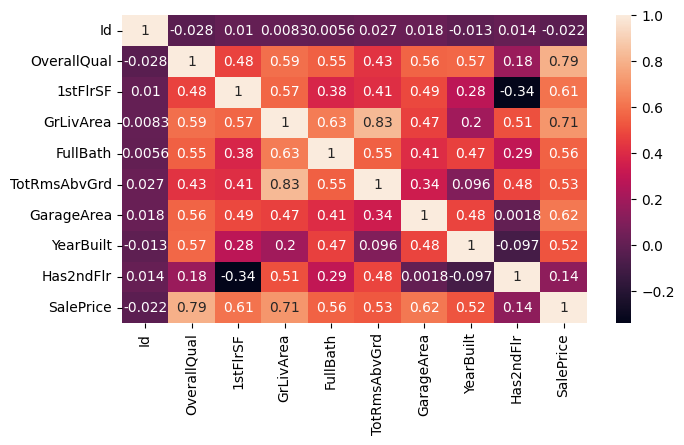

In [598]:
# teste de correlação utilizando as variáveis quantitativas que aparentam ter maior impacto
corrmat = df.corr(numeric_only=True)
plt.figure(figsize=[7.5, 4])
sns.heatmap(corrmat, annot=True)
plt.show()

In [599]:
# criação de colunas dummies para os valores categóricos que aparentam ter maior correlação com o preço do imóvel
def dummies(dataframe):
    dataframe = pd.get_dummies(dataframe, columns=['Neighborhood','CentralAir', 'KitchenQual', 'PoolQC', 'SaleType', 'SaleCondition'])

    return dataframe

df = dummies(df)

In [600]:
# imports para geração do modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# separação de X e y, e de treino e teste
train_data = df.copy()
X = train_data.drop(['Id', 'SalePrice'], axis=1)
y = train_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [601]:
# predição do modelo de teste, e resultados
y_pred = reg.predict(X_test)

y_pred = np.log(y_pred)
y_pred = np.nan_to_num(y_pred, nan=np.nanmean(y_pred))
y_test = np.log(y_test)
y_test = np.nan_to_num(y_test, nan=np.nanmean(y_test))

print('R²', reg.score(X_test, y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R² -262782828605.4121
RMSE: 0.18815119808445768


In [602]:
# leitura do arquivo de teste
url = 'https://raw.githubusercontent.com/Enrico-13/Atividade-02/main/Dados/test.csv'
test_df = pd.read_csv(url)

In [603]:
# adequação da base de dados teste
test_df = missing_values(test_df)
        
test_df = column_filtering(test_df, sale_price=False)

test_df = dummies(test_df)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     1459 non-null   int64  
 1   OverallQual            1459 non-null   int64  
 2   1stFlrSF               1459 non-null   int64  
 3   GrLivArea              1459 non-null   int64  
 4   FullBath               1459 non-null   int64  
 5   TotRmsAbvGrd           1459 non-null   int64  
 6   GarageArea             1459 non-null   float64
 7   YearBuilt              1459 non-null   int64  
 8   Has2ndFlr              1459 non-null   int64  
 9   Neighborhood_Blmngtn   1459 non-null   uint8  
 10  Neighborhood_Blueste   1459 non-null   uint8  
 11  Neighborhood_BrDale    1459 non-null   uint8  
 12  Neighborhood_BrkSide   1459 non-null   uint8  
 13  Neighborhood_ClearCr   1459 non-null   uint8  
 14  Neighborhood_CollgCr   1459 non-null   uint8  
 15  Neig

In [604]:
# para se adequar ao padrão da regressão linear, algumas colunas foram criadas, e outras removidas

additional_columns = test_df.columns.difference(df.columns, sort=False)
test_df = test_df.drop(additional_columns, axis=1)

missing_columns = df.columns.difference(test_df.columns, sort=False)
test_df[missing_columns] = 0


In [605]:
# base de dados foi reorganizada para ficar na mesma ordem em que foi feita a regressão
feature_order = df.columns.drop('SalePrice')

test_df = test_df[feature_order]

In [606]:
# uso do modelo para obtenção dos resultados
y_pred = reg.predict(test_df.drop('Id', axis=1))
y_pred

array([131484.77563797, 164392.78528692, 163726.87841759, ...,
       133230.38071636, 111509.36769229, 206096.74774434])

In [607]:
# inclusão dos resultados na base de dados de teste
test_df['SalePrice'] = y_pred

In [609]:
# criação do dataframe de entrega
output = test_df[['Id', 'SalePrice']]
output

,Id,SalePrice
0,1461,131484.775638
1,1462,164392.785287
2,1463,163726.878418
3,1464,183573.526036
4,1465,255284.134711
...,...,...
1454,2915,76724.416915
1455,2916,75282.649485
1456,2917,133230.380716
1457,2918,111509.367692


In [610]:
# criação do arquivo csv para entrega
file_path = '../Dados/submissions/test_results.csv'
output.to_csv(file_path, sep=',', index=False)